<a href="https://colab.research.google.com/github/diefgallegorio/Estadistica2/blob/main/Caso_practico_RLM_Solucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

#Librerías para acceder a archivos desde google drive en google colaboratory 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Importo base de datos de los resutados de las pruebas saber pro 2019
icfes = '12KFWoUTAoHUPxmL2nYDlvPXcf2KBWwCA'
downloaded = drive.CreateFile({'id': icfes})
downloaded.GetContentFile('Icfes_pro_genericas.csv') 

#Leo la base de datos y pruebo que cargue adecuadamente en Pandas
Xdata = pd.read_csv('Icfes_pro_genericas.csv').loc[:,['MOD_RAZONA_CUANTITAT_PUNT','MOD_INGLES_PUNT','MOD_COMUNI_ESCRITA_PUNT','PUNT_GLOBAL']]

#Exploramos con qué datos contamos, para saber cuáles se pueden incluir en la regresión (Datos cuantitativos o que se puedan convertir en ello)
Xdata.reset_index(inplace=True,drop=True)
Xdata.head()

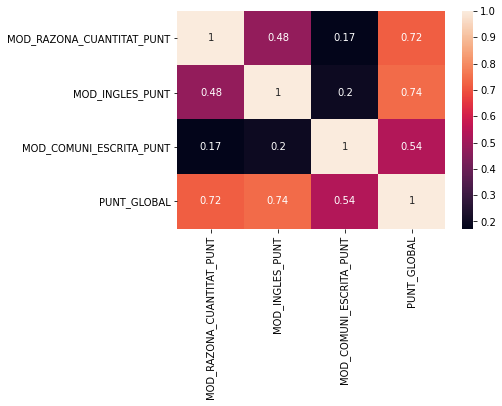

In [ ]:
#  Matriz de correlación
import seaborn as sns
correlation_mat = Xdata.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [ ]:
# variables de entrada en XY_train y la variable de salida pasa de ser “Y” a ser el eje “Z”.

Xdata2 =  Xdata.iloc[:,:-1]
#Imputando los valores NaN con la media 

for i in Xdata2.columns:
  Xdata2[i].fillna((Xdata2[i].mean()), inplace=True)

XY_train = np.array(Xdata2)
z_train = Xdata['PUNT_GLOBAL'].values

Creamos un nuevo objeto de Regresión lineal con SKLearn pero esta vez tendrá las cuatro dimensiones que entrenar: las que contiene XY_train. Al igual que antes, imprimimos los coeficientes y puntajes obtenidos:

In [ ]:
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensione
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción 
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr2.intercept_)
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [0.32430229 0.33835973 0.23181796]
Mean squared error: 81.23
Independent term: 
 14.449119856164714
Variance score: 0.85


In [ ]:
# Para poner en práctica el ejercicio, queremos probarlo prediciendo el PUNTAJE GLOBAL de un estudiante con las siguientes características:
# Estudiante que tiene que paga una matrícula de Entre 500 mil y menos de 1 millón; cursa 10° semestre de su carrera profesional, 
# la vivienda es estrato 4 y trabaja Entre 11 y 20 horas.

z_ = regr2.predict([[120, 140, 100]])
print(int(z_))

123
